# Assignment 3
The objective of this assignment is to get you familiarize with `AutoEncoders`.

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Note
- Code snippets are in ``Pytorch``. If you are comfortable with ``Keras`` feel free to use it. No restrictions on the frameworks

## Datasets 
- CIFAR10

## Packages Used
- Pytorch 
- Refer this link to get familiarity with pytorch and CIFAR10 dataset[link](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment3_Q2.ipynb`.

## Question 2 : Autoencoders


In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

### Load CIFAR 10 Dataset

In [8]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print("Train Data shape:", trainset.data.shape)
print("Test Data shape:", testset.data.shape)

Files already downloaded and verified
Files already downloaded and verified
Train Data shape: (50000, 32, 32, 3)
Test Data shape: (10000, 32, 32, 3)


### Visualize the Data

torch.Size([16, 3, 32, 32])
torch.Size([16])


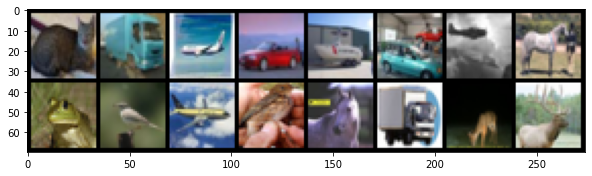

In [9]:
def imshow(img):
    img = img #/ 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

# show images
imshow(torchvision.utils.make_grid(images))

### Define Model
Refer ``` torch.nn ``` [link](https://pytorch.org/docs/stable/nn.html) 

Experiment with different architectures of encoder and decoder i.e
- encoder and decoder is fully connected layers
- encoder and decoder is combination of convolution layers + fully connected layers
- encoder and decoder is fully convolutional layers.

In [33]:
# encoder and decoder is fully connected layers
class Autoencoder1(nn.Module):
    def __init__(self):
        super(Autoencoder1, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            nn.Linear(32,500),
            nn.ReLU(),
            nn.Linear(500,100),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(100,500),
            nn.ReLU(),
            nn.Linear(500,32),
            nn.ReLU()
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# encoder and decoder is combination of convolution layers + fully connected layers
class Autoencoder2(nn.Module):
    def __init__(self):
        super(Autoencoder2, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            nn.Conv2d(3, 12, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Linear(16,500),
            nn.ReLU(),
            nn.Linear(500,100),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            # Write your code here
            nn.Linear(100,500),
            nn.ReLU(),
            nn.Linear(500,16),
            nn.ReLU(),
            nn.ConvTranspose2d(12, 3, 4, stride=2, padding=1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# encoder and decoder is fully convolutional layers. 
class Autoencoder3(nn.Module):
    def __init__(self):
        super(Autoencoder3, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            nn.Conv2d(3, 12, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(12, 48, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(48, 192, 4, stride=2, padding=1),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            # Write your code here
            nn.ConvTranspose2d(192, 48, 4, stride=2, padding=1),
            nn.Sigmoid(),
            nn.ConvTranspose2d(48, 12, 4, stride=2, padding=1),
            nn.Sigmoid(),
            nn.ConvTranspose2d(12, 3, 4, stride=2, padding=1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [30]:
def print_model(encoder, decoder):
    print("############## Encoder ##############")
    print(encoder)
    print("############## Decoder ##############")
    print(decoder)
    print("")

def create_and_run_model(ind):
    if ind == 1:
        autoencoder = Autoencoder1()
        file_name = 'autoencoder1.pt'
    elif ind == 2:
        autoencoder = Autoencoder2()
        file_name = 'autoencoder2.pt'
        
    else:
        autoencoder = Autoencoder3()
        file_name = 'autoencoder3.pt'
        
    print_model(autoencoder.encoder, autoencoder.decoder)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(autoencoder.parameters())
    
    for epoch in range(5):
        running_loss = 0.0
        for i, (inputs, _) in enumerate(trainloader, 0):
            inputs = Variable(inputs)

            # ============ Forward ============
            encoded, outputs = autoencoder(inputs)
            loss = criterion(outputs, inputs)
            # ============ Backward ============
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # ============ Logging ============
            running_loss += loss.data
            if i % 2000 == 1999:
                print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0

    print('Finished Training')
    print('Saving Model...')
    torch.save(autoencoder.state_dict(), file_name)
    
    load_filepath = './' + file_name 
    autoencoder.load_state_dict(torch.load(load_filepath))
    
    dataiter = iter(testloader)
    images, labels = dataiter.next()
    print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
    imshow(torchvision.utils.make_grid(images))

    images = Variable(images)

    print("Reconstructed image")
    decoded_imgs = autoencoder(images)[1]
    imshow(torchvision.utils.make_grid(decoded_imgs.data))


### Loss and Optimizer

############## Encoder ##############
Sequential(
  (0): Linear(in_features=32, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=100, bias=True)
  (3): ReLU()
)
############## Decoder ##############
Sequential(
  (0): Linear(in_features=100, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=32, bias=True)
  (3): ReLU()
)

[1,  2000] loss: 0.020
[2,  2000] loss: 0.009
[3,  2000] loss: 0.009
[4,  2000] loss: 0.009
[5,  2000] loss: 0.009
Finished Training
Saving Model...
GroundTruth:    cat  ship  ship plane  frog


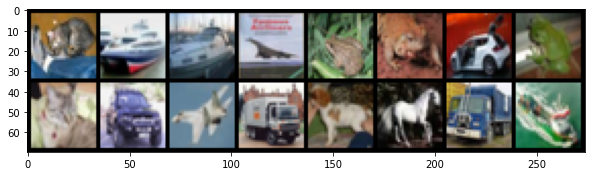

Reconstructed image


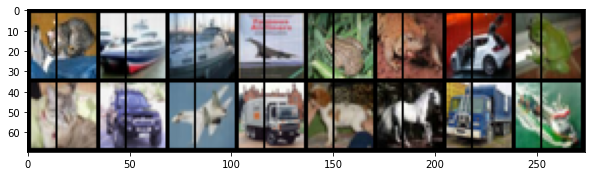

In [31]:
create_and_run_model(1)

############## Encoder ##############
Sequential(
  (0): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): Linear(in_features=16, out_features=500, bias=True)
  (3): ReLU()
  (4): Linear(in_features=500, out_features=100, bias=True)
  (5): ReLU()
)
############## Decoder ##############
Sequential(
  (0): Linear(in_features=100, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=16, bias=True)
  (3): ReLU()
  (4): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (5): Sigmoid()
)

[1,  2000] loss: 0.009
[2,  2000] loss: 0.005
[3,  2000] loss: 0.005
[4,  2000] loss: 0.003
[5,  2000] loss: 0.003
Finished Training
Saving Model...
GroundTruth:    cat  ship  ship plane  frog


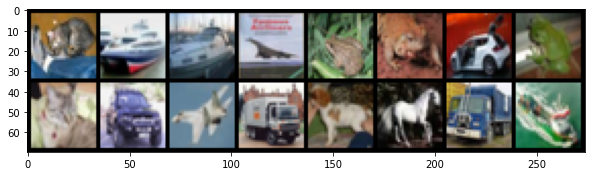

Reconstructed image


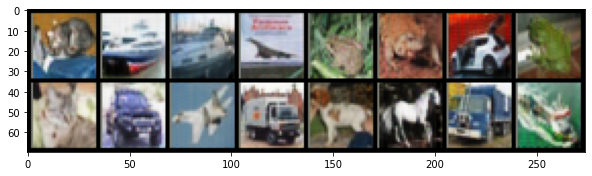

In [32]:
create_and_run_model(2)

############## Encoder ##############
Sequential(
  (0): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(12, 48, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (3): ReLU()
  (4): Conv2d(48, 192, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (5): ReLU()
)
############## Decoder ##############
Sequential(
  (0): ConvTranspose2d(192, 48, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): Sigmoid()
  (2): ConvTranspose2d(48, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (3): Sigmoid()
  (4): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (5): Sigmoid()
)

[1,  2000] loss: 0.015
[2,  2000] loss: 0.004
[3,  2000] loss: 0.003
[4,  2000] loss: 0.002
[5,  2000] loss: 0.002
Finished Training
Saving Model...
GroundTruth:    cat  ship  ship plane  frog


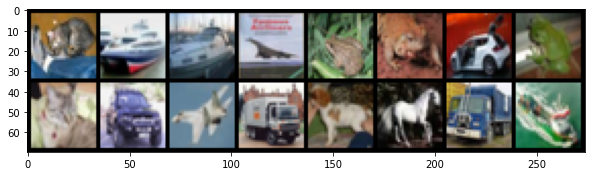

Reconstructed image


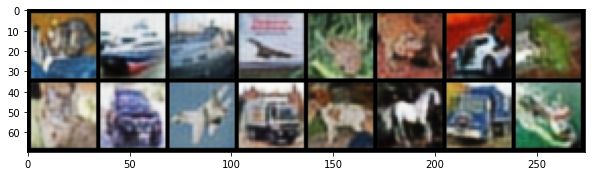

In [34]:
create_and_run_model(3)

### Training

#### Provide Qualitative Results and Aanlysis with different encoder and decoder architectures as mentioned above.

The Autoencoder in which both convolutional layers and fully connected layers are used has produced fantastic results, and the autoencoder in which only convolutional layers were used produced better results than autoencoder in which only fully connected layers were used.

#### 2.1 What are the Applications of Autoencoders and different types of Autoencoders



Appplications of Autoencoders:

Dimensionality Reduction, Image Compression, Image Denoising, Feature Extraction, Image generation, Sequence to sequence prediction, Recommendation system.


Different tyes of Autoencoders:

a) Denoising autoencoder: Denoising autoencoders create a corrupted copy of the input by introducing some noise. This helps to avoid the autoencoders to copy the input to the output without learning features about the data. These autoencoders take a partially corrupted input while training to recover the original undistorted input. The model learns a vector field for mapping the input data towards a lower dimensional manifold which describes the natural data to cancel out the added noise.


b) Sparse Autoencoder: Sparse autoencoders have hidden nodes greater than input nodes. They can still discover important features from the data. A generic sparse autoencoder is visualized where the obscurity of a node corresponds with the level of activation. Sparsity constraint is introduced on the hidden layer. This is to prevent output layer copy input data. Sparsity may be obtained by additional terms in the loss function during the training process, either by comparing the probability distribution of the hidden unit activations with some low desired value,or by manually zeroing all but the strongest hidden unit activations. Some of the most powerful AIs in the 2010s involved sparse autoencoders stacked inside of deep neural networks.


c) Deep Autoencoder: Deep Autoencoders consist of two identical deep belief networks, oOne network for encoding and another for decoding. Typically deep autoencoders have 4 to 5 layers for encoding and the next 4 to 5 layers for decoding. We use unsupervised layer by layer pre-training for this model. The layers are Restricted Boltzmann Machines which are the building blocks of deep-belief networks. Processing the benchmark dataset MNIST, a deep autoencoder would use binary transformations after each RBM. Deep autoencoders are useful in topic modeling, or statistically modeling abstract topics that are distributed across a collection of documents. They are also capable of compressing images into 30 number vectors.


d) Contractive Autoencoder: The objective of a contractive autoencoder is to have a robust learned representation which is less sensitive to small variation in the data. Robustness of the representation for the data is done by applying a penalty term to the loss function. Contractive autoencoder is another regularization technique just like sparse and denoising autoencoders. However, this regularizer corresponds to the Frobenius norm of the Jacobian matrix of the encoder activations with respect to the input. Frobenius norm of the Jacobian matrix for the hidden layer is calculated with respect to input and it is basically the sum of square of all elements.


Undercomplete Autoencoder: The objective of undercomplete autoencoder is to capture the most important features present in the data. Undercomplete autoencoders have a smaller dimension for hidden layer compared to the input layer. This helps to obtain important features from the data. It minimizes the loss function by penalizing the g(f(x)) for being different from the input x.


Convolutional Autoencoder: Autoencoders in their traditional formulation does not take into account the fact that a signal can be seen as a sum of other signals. Convolutional Autoencoders use the convolution operator to exploit this observation. They learn to encode the input in a set of simple signals and then try to reconstruct the input from them, modify the geometry or the reflectance of the image. They are the state-of-art tools for unsupervised learning of convolutional filters. Once these filters have been learned, they can be applied to any input in order to extract features. These features, then, can be used to do any task that requires a compact representation of the input, like classification.


Variational Autoencoder: Variational autoencoder models make strong assumptions concerning the distribution of latent variables. They use a variational approach for latent representation learning, which results in an additional loss component and a specific estimator for the training algorithm called the Stochastic Gradient Variational Bayes estimator. It assumes that the data is generated by a directed graphical model and that the encoder is learning an approximation to the posterior distribution where Ф and θ denote the parameters of the encoder (recognition model) and decoder (generative model) respectively. The probability distribution of the latent vector of a variational autoencoder typically matches that of the training data much closer than a standard autoencoder.


####2.2 PCA versus Autoencoders. Give detailed differences between them. (can use equations in latex and figures for the justification).

a) PCA is essentially a linear transformation but Auto-encoders are capable of modelling complex non linear functions.

b) PCA features are totally linearly uncorrelated with each other since features are projections onto the orthogonal basis. But autoencoded features might have correlations since they are just trained for accurate reconstruction.

c) PCA is faster and computationally cheaper than autoencoders.

d) A single layered autoencoder with a linear activation function is very similar to PCA.

e) Autoencoder is prone to overfitting due to high number of parameters. (though regularization and careful design can avoid this)